In [69]:
import torch 
import matplotlib.pyplot as plt
%matplotlib inline 

# Implementing Bigram Model 

In [70]:
chars = list('abcdefghijklmnopqrstuvwxyz')  
words = open('names.txt', 'r').read().splitlines()


In [71]:
N = torch.zeros((27,27),dtype = torch.int32) # init 
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 
itos = {i:s for s,i in stoi.items()} 
#stoi , itos 

In [72]:
for w in words : 
  chs = ['.'] + list(w) + ['.']
  for u,v in zip(chs,chs[1:]):
    x = stoi[u]
    y = stoi[v]
    N[x,y]+=1 
#N,N.size()

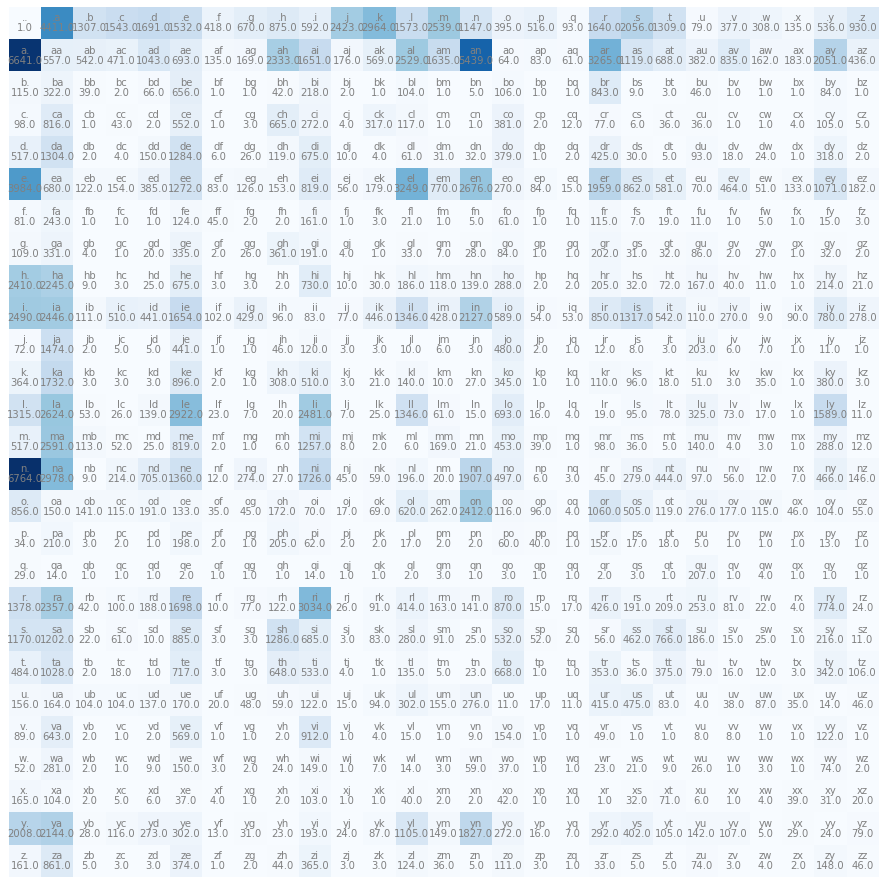

In [73]:
# yoinked for vis, maps freq
NN = (N+1).float()
plt.figure(figsize=(16,16))
plt.imshow(NN, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, NN[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [74]:
p = N[0].float() 
p/=p.sum()
p,p.sum()  #normalized vals

(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]),
 tensor(1.))

In [75]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix,itos[ix]

(13, 'm')

In [76]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p , p.sum() # 3 samples

(tensor([0.6064, 0.3033, 0.0903]), tensor(1.))

In [77]:
torch.multinomial(p,num_samples = 100 , replacement = True , generator = g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [78]:
P.sum(1,keepdim = True).shape

torch.Size([27, 1])

In [79]:
P.sum(0,keepdim = True).shape


torch.Size([1, 27])

In [80]:
P =(N+1).float() # +1 to avoid 0's in the matrix which affects the compute later 
P/=P.sum(1,keepdims = True) 
P


tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [81]:
g = torch.Generator().manual_seed(214748347) 
for i in range(10) : 
  out = [] 
  idx = 0 
  while True : 
    p = P[idx] 
    idx = torch.multinomial(p,num_samples = 1, replacement=True,generator=g).item() 
    out.append(itos[idx])
    if idx == 0 : 
      break
  print(''.join(out))


ahayat.
meliorima.
ssen.
iovenan.
xlariewor.
gaclah.
davasazhon.
baras.
lee.
bre.


In [99]:
# loss computation 
log_likelyhood = 0.0
cnt = 0 
for w in words : 
  chs = ['.'] + list(w) + ['.'] 
  for u , v in zip(chs,chs[1:]):
    x = stoi[u]
    y = stoi[v]
    prob = P[x,y]
    logprob = torch.log(prob)   
    log_likelyhood +=logprob
    cnt+=1

nll = -log_likelyhood #negative log likelyhood  
print(f'{log_likelyhood =}')
nll,nll/cnt

log_likelyhood =tensor(-559951.5625)


(tensor(559951.5625), tensor(2.4544))

In [116]:
# creating training sets

xs , ys = [],[] 
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for u,v in zip(chs,chs[1:]): 
    #print(u,v)
    x = stoi[u]
    y = stoi[v]
    xs.append(x)
    ys.append(y) 

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [117]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes = 27).float() # encoding xs in to one_hot representation easier to pluck
xenc , xenc.shape ,xenc.dtype


(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 torch.Size([5, 27]),
 torch.float32)

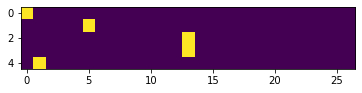

In [123]:
plt.imshow(xenc)

In [125]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27),generator = g)
xenc @ W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [118]:
# init parameters  
W = torch.randn((27,1))   
W.shape , W
out =  xenc @ W #dot prod in torch 
out.shape



torch.Size([5, 1])

In [134]:
logits = xenc @ W 
counts = logits.exp()
probs = counts/counts.sum(1,keepdims = True)
probs,logits, 
probs[0],probs.shape , probs[0].sum()

(tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459]),
 torch.Size([5, 27]),
 tensor(1.0000))

In [135]:
#only for e m m a 

nlls = torch.zeros(5)
for i in range(5):
  x = xs[i].item() #input
  y = ys[i].item() #label
  print('--------') # print statemts copied
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [138]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)  
W.shape


torch.Size([27, 27])

In [163]:
#putting it together 

# creating dataset
xs,ys  =  [] ,[] 
for w in words:
  chs =['.'] + list(w) + ['.']
  for u , v in zip(chs,chs[1:]):
    x = stoi[u] 
    y = stoi[v] 
    xs.append(x)
    ys.append(y)

xs = torch.tensor(xs)
ys = torch.tensor(ys)  
xs,ys
print('no of examples =',xs.size())

no of examples = torch.Size([228146])


In [175]:
for _ in range(10):
  
  #forward pass 
  xenc = F.one_hot(xs,num_classes = 27).float()
  logits = xenc@W
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdims=True)
  loss = -probs[torch.arange(xs.nelement()),ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  #backward pass  

  W.grad = None 
  loss.backward()
  lr = -50 
  #update 
  W.data += lr * W.grad

2.4816300868988037
2.481626272201538
2.4816226959228516
2.481619358062744
2.4816155433654785
2.481611490249634
2.4816079139709473
2.48160457611084
2.481600761413574
2.481597423553467


In [187]:
# finally, sample from the 'neural net' model  (copied)
g = torch.Generator().manual_seed(21478649)

for i in range(10):
  
  out = []
  ix = 0
  while True:
    
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

lazixan.
raelo.
jianaron.
n.
tledrduiccimcanana.
kai.
caaneeywake.
bhosa.
larn.
lila.
